# Laboratorio 5 de Física Computacional (FS0432) - Sebastián Alí Sacasa Céspedes, C4J546 
## Código con comentarios al final de las celdas.

# Derivadas Numéricas

Al contrario de las integrales, las derivadas usualmente pueden ser evaluadas de forma analítica. Además de esto, existen ciertos problemas que hacen la **evualuación de derivadas numéricas inestables a errores de redondeo debido a la precisión de números flotantes**. Sin embargo, existen al menos dos aplicaciones prácticas:
* Solución de ecuaciones diferenciales parciales: existen muchos métodos, algunos basados en técnicas de diferenciación numérica. Entraremos más en detalle más adelante en el curso.
* Derivadas numéricas de conjuntos de datos.
* Algunos algoritmos para resolver ecuaciones que no tienen solución analítica.

Para el segundo y tercero de estos casos, en la rama de las matemáticas aplicadas se han desarrollado mejores técnicas; e.g., [diferenciación automática](https://en.wikipedia.org/wiki/Automatic_differentiation), las cuales no sufren de la problemática de las diferencias finitas.

No obstante, para algunos algoritmos es importante entender y tener claro el concepto.

## Diferencias hacia adelante y hacia atrás

La idea es muy sencilla. Conocemos la definición formal de una derivada:
$$
\frac{{\rm d}f(x)}{{\rm d}x} = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h}.
$$
A nivel numérico, la definición es la misma, con la excepción de que se considera un valor de $h$ lo suficientemente pequeño de manera tal que la derivada está relativamente bien aproximada.

En la práctica, existen dos formas de realizar la misma operación.
La primera, es la diferencia hacia adelante
$$
\frac{{\rm d}f(x)}{{\rm d}x} \approx \frac{f(x + h) - f(x)}{h}
$$
y la segunda es la diferencia hacia atrás
$$
\frac{{\rm d}f(x)}{{\rm d}x} \approx \frac{f(x) - f(x - h)}{h}.
$$
Para efectos prácticos, ambas aproximaciones evaluan la derivada de manera muy similar en casos típicos donde podemos utilizar dicha metodología.

Ver Fig. 1 para visualizar la diferencia.


Las diferencias finitas para aproximar derivadas están basadas en expansiones de Taylor, al igual que la estimación de errores. Note que su estimación es considerablemente más sencilla que las integrales.

El único parámetro de control corresponde al valor de $h$.

## Errores

Para analizar cual es el valor requerido de $h$ para cierta aplicación, necesitamos evaluar el error asociado con la estimación. Esto es muy sencillo al observar la expansión de Taylor de la función
$$
f(x+h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x) + O(h^3),
$$
de manera tal que
$$
f'(x) = \frac{f(x+h) - f(x)}{h} - \frac{h}{2} f''(x) + O(h^2).
$$
Note que el primer término del lado derecho de la ecuación anterior es nuestra aproximación, de manera tal que el error **escala linealmente con $h$**. Esta misma derivación se puede realizar para las diferencias hacia adelante y hacia atrás.

La aproximación, por ende, es del mismo orden de magnitud de $h$ si ignoramos los términos de orden mayor. Esto implica que, en general, debemos utilizar valores de $h$ muy pequeños con los cuales podemos sufrir errores de redondeo de operaciones de punto flotante.

### Análisis de errores de punto flotante

En efecto, el mayor orden del error depende de la magnitud $\frac{1}{2}h|f''(x)|$. El problema es que sustraer números de magnitud pequeña de punto flotante puede dar lugar a amplios errores en la computadora si los términos son muy similares en magnitud. Este es precisamente el caso aquí, en el cual debemos sustraer 
$$
f(x + h) - f(x),
$$
cuando consideramos valores de $h$ muy pequeños. 

De esta manera, **debemos considerar valores de $h$ pequeños en magnitud para mejorar la aproximación, pero esto nos lleva a grandes errores de redondeo computacionales.**

En Python, podemos calcular un número como $f(x)$ con una precisión $Cf(x)$, donde el valor de $C$ varía pero usualmente en orden de magnitud $C \sim 10^{-16}$. En el peor de los casos (cuando los errores no se cancelan) podemos decir que podemos aproximar $f(x + h) - f(x)$ con una precisión de 
$$
2C|f(x)|.
$$
De esta manera, el **error de redondeo** es approximadamente $\sim 2C|f(x)| / h$. Combinado con el **error de aproximación**, tenemos el error total
\begin{align}
\label{eq:total_error} \tag{1}
\boxed{\epsilon = \frac{2C|f(x)|}{h} + \frac{1}{2}h|f''(x)|.}
\end{align}
Para minimizar este error, evaluamos ${\rm d}\epsilon / {\rm d}h = 0$, tal que
$$
-\frac{2C|f(x)|}{h^2} + \frac{1}{2}|f''(x)| = 0.
$$
Podemos resolver para el valor de $h_{\rm min}$, obtenemos
$$
h_{\rm min} = \sqrt{4C\frac{|f(x)|}{|f''(x)|}},
$$
tal que al substituir en Eq. $\eqref{eq:total_error}$ da lugar al error mínimo
$$
\epsilon_{\rm{min}} = \sqrt{4C|f(x)||f''(x)|}.
$$
Si $|f(x)| \sim |f''(x)| \sim 1$, entonces un valor de $h \sim \sqrt{C} \sim 10^{-8}$ nos da un error total del mismo orden de magnitud. 

Para comparación, este error es sustancialmente más grande que el de cualquier algoritmo que hemos discutido en esta clase. Hacer el mismo desarrollo anterior para el caso de las diferencias hacia atrás nos da el mismo resultado.

## Diferencias Centrales

El análisis anterior nos indica que debemos tener mucho cuidado al utilizar diferencias finitas. En particular, el problema se hace más grande cuando utilizamos diferencias finitas repetidas veces, en cuyo caso el error se **acumula**.

Existe una forma sencilla de aliviar este problema de manera parcial. Consideremos el caso de **diferencias centrales**, tal que
$$
\frac{{\rm d}f(x)}{{\rm d}x} \approx \frac{f(x + h/2) - f(x - h/2)}{h}.
$$
Al igual que el caso de diferencias hacia delante y hacia atrás, la subdivisión sigue siendo de tamaño $h$. El cambio es que ahora los puntos están colocados de forma simétrica alrededor de $x$. El error de aproximación sigue el mismo procedimiento anterior utilizando expansiones de Taylor, lo que da lugar a
$$
f'(x) = \frac{f(x + h/2) - f(x - h/2)}{h} - \frac{h^2}{24} f'''(x) + \cdots
$$
Este cambio tan sencillo nos da un orden de magnitud más alto al error de aproximación. Al proceder de la misma forma que lo hicimos anteriormente, minimizar el error $\epsilon$ resulta en
$$
\epsilon_{\rm min} = (\frac{9}{8} C^2 [f(x)]^2 |f'''(x)|)^{1/3}.
$$
En este caso, si $|f(x)| ~\sim |f'''(x)| ~\sim 1$, el valor ideal de $h \sim C^{1/3} ~\sim 10^{-5}$, pero el error total $\epsilon \sim C^{2/3} \sim 10^{-10}$.
De esta manera, podemos mejorar nuestra aproximación por dos ordenes de magnitud utilizando **diferencias centrales**.

En la medida de lo posible, si se debe utilizar diferencias finitas, lo correcto es utilizas diferencias centrales.

## Ejemplo

Evaluemos el error al que incurrimos utilizando diferencias finitas con un ejemplo. Consideremos
$$
f(x) = e^{-x^2}
$$
y evaluemos su derivada en el punto $x = 0.5$. 

Empezamos por definir nuestras funciones de diferencias finitas:

In [35]:
def backward_difference(func, x, h):
    return (func(x) - func(x - h)) / h

def forward_difference(func, x, h):
    return (func(x + h) - func(x)) / h

def central_difference(func, x, h):
    return (func(x + (h / 2)) - func(x - (h / 2))) / h

Evaluemos el resultado utilizando diferentes valores de $h$, cambiando en orden de magnitud:

In [36]:
import numpy as np

h_vals = np.logspace(-16, 0, 17)
print(h_vals)

[1.e-16 1.e-15 1.e-14 1.e-13 1.e-12 1.e-11 1.e-10 1.e-09 1.e-08 1.e-07
 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00]


Nos interesa la diferencia absoluta entre el valor análitico y nuestra aproximación numérica:

In [37]:
f_prime_analytic = -2.0 * 0.5 * np.exp(-1.0 * 0.5 * 0.5)

Y ahora hacemos nuestro cálculo:

In [38]:
def func(x):
    return np.exp(-1.0 * x * x)

backward_results = np.array([backward_difference(func, 0.5, h_vals[i]) for i in range(h_vals.size)])
forward_results = np.array([forward_difference(func, 0.5, h_vals[i]) for i in range(h_vals.size)])
central_results = np.array([central_difference(func, 0.5, h_vals[i]) for i in range(h_vals.size)])

Hagamos un gráfico en escala logarítmica del error relativo de nuestros resultados con respecto al resultado analítico como función de $h$:

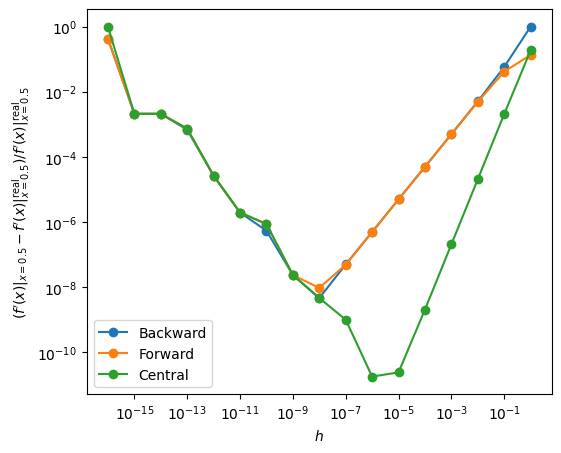

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.yscale("log")
plt.xscale("log")

plt.xlabel(r"$h$")
plt.ylabel(r"$(f'(x)|_{x=0.5} - f'(x)|^{\rm{real}}_{x=0.5}) / f'(x)|^{\rm{real}}_{x=0.5}$")

plt.plot(h_vals, np.abs((backward_results - f_prime_analytic) / f_prime_analytic), '-o', label='Backward')
plt.plot(h_vals, np.abs((forward_results - f_prime_analytic) / f_prime_analytic), '-o', label='Forward')
plt.plot(h_vals, np.abs((central_results - f_prime_analytic) / f_prime_analytic), '-o', label='Central')
plt.legend()
plt.show()

* Existen formas de mejorar este error estudiando ordenes mayores en la aproximación (similar a lo que hicimos con integración)
* **Crucialmente**, con el segundo orden obtenemos la misma precisión y debemos ir a 3$^{\rm{er}}$ orden para notar una mejora!
* Para efectos prácticos, aproximaciones de mayor orden suelen no ser convenientes.
* Las reglas estudiadas aquí se extienden fácilmente a segundas derivadas y derivadas parciales, con sus respectivos errores mínimos.

# Interpolación

Supongamos que tenemos los valores de una función $f(x)$ en solamente dos puntos $x = a, b$ y queremos saber el valor de la función en otro punto $x$ tal que $a \lt x \lt b$. 

Existen distintas posibilidades para aproximar este valor. La más sencilla es **interpolación lineal**, en la cual se traza una línea recta entre los puntos $a$ y $b$. (Ver Fig. 2)

Recuerde que el concepto de interpolación es distinto al concepto de ajustes de datos.

El álgebra de la interpolación lineal es muy sencilla. La pendiente de la recta es
$$
m = \frac{f(b) - f(a)}{b - a}.
$$
y la distancia vertical marcada en el gráfico es $y = m(x-a)$ y $z = f(a)$, tal que
$$
f(x) \approx y + z = \frac{(b-x)f(a) + (x-a)f(b)}{b-a}.
$$
Esta ecuación es la ecuación fundamental de interpolación lineal. Se puede utilizar también para **extrapolación**. 

### Análisis de errores

El error al que incurrimos con una interpolación lineal sigue de la expansión de Taylor. Tenemos
$$
f(a) = f(x) + (a-x)f'(x) + \frac{1}{2}(a-x)^2f''(x) + \cdots
$$
y
$$
f(b) = f(x) + (b-x)f'(x) + \frac{1}{2}(b-x)^2f''(x) + \cdots,
$$
de manera tal que al sustituir en la ecuación de la interpolación obtenemos
$$
f(x) = \frac{(b-x)f(a) + (x-a)f(b)}{b-a} + (a-x)(b-x)f''(x) + \cdots
$$
El primer término es nuestra aproximación, de manera tal que el segundo término es el orden mayor del error de aproximación. Conforme $x$ se aproxima a $a$ o a $b$, el error decrece.

El error es mayor en el punto medio entre $a$ y $b$, de manera tal que si definimos $b - a = h$, en el medio tenemos $x - a = b - x = h / 2$. Esto implica que el mayor orden del error es
$$
\epsilon_{\rm max} = \frac{1}{4}h^2|f''(x)| + O(h^{\geq 3}).
$$
En este caso, *no tenemos que preocuparnos por el error de redondeo*. Esto se debe a que la interpolación se refiere a la **suma de dos valores cercanos y no a su diferencia**.

### Métodos de orden mayor

* Existen métodos de mayor orden conocidos como métodos de interpolación de Lagrange: la idea es usar polinomios de mayor orden
* Si tenemos un número $N$ de puntos base en nuestros datos, ingenuamente podríamos creer establecer un polinomio de orden $N-1$ entre los puntos sería la mejor aproximación
* El problema es que los polinomios de orden alto contienen muchas oscilaciones, haciendo la aproximación de interpolación muy pobre
* Un método común, es utilizar polinomios en los puntos del medio y sus derivadas en los puntos extremos, de manera tal que se obtiene una curva que aproxima los puntos pero contiene pendientes suaves en el medio
* Esta técnica se conoce como **splines**
* La más común es la *spline* cúbica.



## Ejemplo

Realicemos un ejemplo de interpolación utilizando `SciPy`.

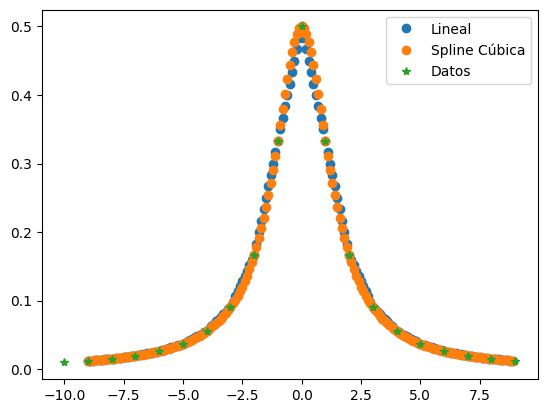

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline, interp1d

# Datos ficticios para la interpolación
x = np.arange(-10,10)
y = 1.0 / (2.0 + x**2)

# Puntos en los cuales queremos hacer la interpolación
xs = np.arange(-9, 9, 0.1)

# Interpolación Lineal
linear_int = interp1d(x,y)
ys_lin = linear_int(xs)

# Spline cúbica
cs = CubicSpline(x, y)
ys_cub = cs(xs)
  
# Gráfico
plt.plot(xs, ys_lin, 'o', label='Lineal')
plt.plot(xs, ys_cub, 'o', label='Spline Cúbica')
plt.plot(x, y, '*', label='Datos')
plt.legend()
plt.show()

# Solución de las raíces de ecuaciones no lineales

Existen diversas metodologías para resolver ecuaciones no lineales. 

### El método de relajación

La idea es resolver una ecuación de la forma
$$
x = f(x).
$$
Para utilizar esta metodología, se requiere escribir la ecuación en esta forma.

La idea corresponde a utilizar una solución inicial $x = x_0$, e iterar hasta que la solución se relaja a un punto de estado estable. 

$$x_1 = f(x_0)$$
$$x_2 = f(x_1)$$
$$\vdots$$

* Esta metodología solo funciona para ecuaciones que tienen puntos estables en su solución
* La condición inicial es muy importante dependiendo de la solución inicial
* Existe una forma de evaluar si el método converge
  - La convergencia depende de si $|f'(x^*)|$ es menor o mayor a 1, donde $x^*$ es la solución de la ecuación
  - Si es mayor a 1, el método no relaja a una solución (ver Cap. 6 Newman)

### El método de Newton


El método de Newton es un método numérico para encontrar raíces de una función no lineal de manera muy sencilla. 
Se utiliza para resolver los valores de $x$ tal que
$$
f(x) = 0
$$

El método comienza con una suposición inicial y se itera con base en el algoritmo
$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.
$$
* Su tasa de convergencia es más rápida que el método de relajación
* Se debe conocer de alguna forma $f'(x)$
  - Esto se puede encontrar de manera analítica
  - Si una expresión analítica no es posible, se puede evaluar de manera numérica utilizando diferencias finitas. Cuando $f'(x)$ se evalúa de manera numérica, el método se conoce como *método de Newton de las secantes*
* No necesariamente converge y depende de la suposición inicial
* Si $f'(x)$ es muy pequeña en magnitud, la convergencia puede ser muy lenta

### El método de bisección 


Este método es muy sencillo y su objetivo es inicial con algún valor inicial $x_1$ tal que $f(x_1) > 0$ y otro valor $x_2$ tal que $f(x_2) < 0$.

Posteriormente:
* Se escoge el punto medio $x' = (x_1 + x_2) / 2$
* Se evalúa $f(x')$
* Dependiendo de la positividad de $f(x')$ se escoge un nuevo intervalo (e.g., en el diagrama anterior, se escogerían los nuevos límites del intervalo como $(x_1, x')$
* Se repite hasta precisión deseada

Algunos detalles del método:
* Existe un número par de raíces: en este caso, el método no puede encontrar ni una sola raíz
* Intervalos muy grandes pueden ignorar ciertas raíces
* Converge más lentamente que el método de Newton
* Usualmente es útil solo cuando conocemos un aproximado de donde puede estar ubicada cierta raíz

## Laboratorio

Implementemos el método de Newton y el método de bisección con un ejemplo.

Queremos encontrar la raíz de la ecuación no lineal
$$
f(x) = 5e^{-x} + x - 5,
$$
con una tolerancia de $\epsilon = 10^{-6}$.
Primero definimos nuestra función de prueba

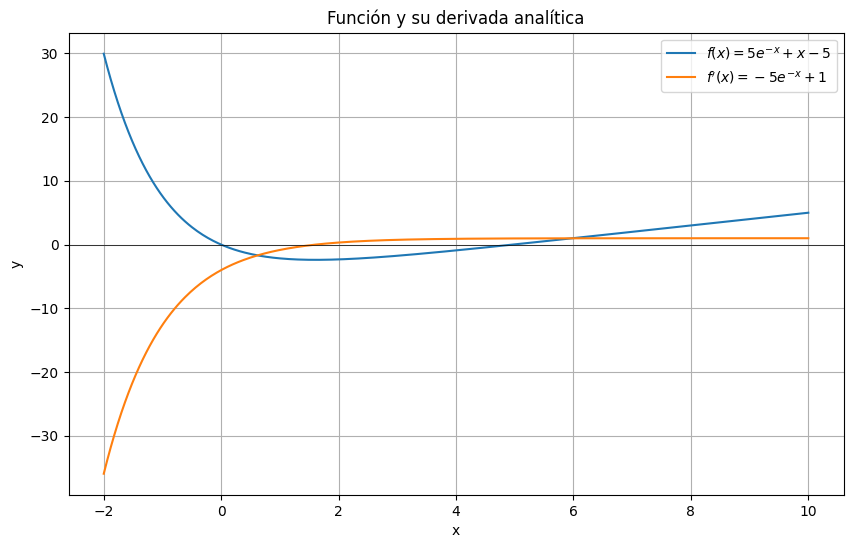

In [41]:
import numpy as np
import matplotlib.pyplot as plt
# Se definen la función y su derivada analítica
def non_lin_func(x):
    return 5.0*np.exp(-x)+x-5.0

def fprime_analitica(x):
    return -5.0*np.exp(-x)+1.0

x = np.linspace(-2, 10, 400)# Se define el rango de x
# Gráfico de la función y su derivada analítica

plt.figure(figsize=(10, 6))
plt.plot(x, non_lin_func(x), label='$f(x) = 5e^{-x} + x - 5$')
plt.plot(x, fprime_analitica(x), label='$f\'(x) = -5e^{-x} + 1$')
plt.axhline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Función y su derivada analítica')
plt.show()

Ahora implementemos el método de Newton. Note que la función se puede derivar fácilmente de manera analítica, por lo cual no necesitamos evaluar de manera numérica su derivada. Escriba una rutina que evalúa la raíz de la ecuación a la tolerancia indicada y devuelve el valor de la raíz y el número de iteraciones requeridas.

In [ ]:

# Su código aquí
def newton(x0, f, fprime, epsilon=1e-6, max_iter=100):
    x = x0
    for iteraciones in range(max_iter):
        fx = f(x)
        if abs(fx) < epsilon:
            return x, iteraciones+1
        
        fpx = fprime(x)
        if abs(fpx) < epsilon:  # Evita división por cero
            break
            
        x=x-fx/fpx # Actualiza x usando la fórmula de Newton
        
    raise RuntimeError("El método de Newton no convergió")

# Identifica intervalos donde la función cambia de signo para conocer su concavidad
x_vals = np.linspace(-2, 10, 1000)

f_vals = non_lin_func(x_vals)

intervalos = [] # Lista para almacenar los intervalos donde la función cambia de signo
signo_previo = np.sign(f_vals[0])

for i in range(1, len(x_vals)): # Recorre los valores de x
    signo_actual=np.sign(f_vals[i]) # Obtiene el signo actual de la función
    
    if signo_actual!=signo_previo: # Si el signo ha cambiado, hay una raíz en el intervalo

        intervalos.append((x_vals[i-1], x_vals[i])) # Agrega el intervalo a la lista

    signo_previo=signo_actual # Actualiza el signo previo

# Calcula raíces usando el método de Newton
print("Resultados del método de Newton")
for a, b in intervalos:
    
    x0_newton=(a+b)/2 # Punto medio del intervalo como x0
    
    raiz_newton, iter_newton = newton(x0_newton, non_lin_func, fprime_analitica) # Llama a la función newton
    
    print(f"Intervalo {a:.4f}, {b:.4f} implica que x = {raiz_newton:.8f} ({iter_newton} iteraciones)") # Imprime resultados

# Análisis de convergencia de Newton con distintos x0

print("\nAnálisis de convergencia del método de Newton")

x0_pruebas = [-1, 0, 1, 2, 3, 5, 8, 10]

for x0 in x0_pruebas: # Recorre los distintos x0
   
    try:
      
        raiz, iteraciones = newton(x0, non_lin_func, fprime_analitica) # Llama a la función newton
      
        print(f"x0 = {x0:2d} implica la raíz = {raiz:.8f} ({iteraciones} iteraciones)") # Imprime resultados
    except Exception as e:
       
        print(f"x0 = {x0:2d} implica que el error es {e}") # Maneja errores si no converge

Resultados del método de Newton:
Intervalo -0.0060, 0.0060 implica que x = 0.00000000 (1 iteraciones)
Intervalo 4.9550, 4.9670 implica que x = 4.96511454 (2 iteraciones)

Análisis de convergencia del método de Newton
x0 = -1 implica la raíz = -0.00000000 (6 iteraciones)
x0 =  0 implica la raíz = 0.00000000 (1 iteraciones)
x0 =  1 implica la raíz = -0.00000000 (8 iteraciones)
x0 =  2 implica la raíz = 4.96511423 (5 iteraciones)
x0 =  3 implica la raíz = 4.96511430 (4 iteraciones)
x0 =  5 implica la raíz = 4.96511423 (3 iteraciones)
x0 =  8 implica la raíz = 4.96511423 (4 iteraciones)
x0 = 10 implica la raíz = 4.96511423 (4 iteraciones)


Implementemos el método de la bisección y evaluemos su comportamiento.

In [51]:
# Su código aquí
def bisection(a, b, f, epsilon=1e-6, max_iter=100): # Método de bisección
    if f(a) * f(b) >= 0:
        raise ValueError("La función debe cambiar de signo en el intervalo [a,b]")
    
    for iteraciones in range(max_iter): # Itera hasta max_iter
        c = (a + b) / 2
        if abs(f(c)) < epsilon:
            return c, iteraciones + 1 # Retorna la raíz y el número de iteraciones
            
        if f(a) * f(c) < 0: # Si el signo cambia entre a y c
            b = c # Actualiza b
        else:
            a = c # Actualiza a
            
    raise RuntimeError("El método de bisección no convergió") # Si no converge

# Identificar intervalos donde la función cambia de signo
x_vals = np.linspace(-2, 10, 1000)
f_vals = non_lin_func(x_vals) # Valores de la función en los puntos anteriormente definidos.

intervalos = []
signo_previo = np.sign(f_vals[0]) # Signo del primer valor de la función

for i in range(1, len(x_vals)): # Recorre los valores de x

    signo_actual = np.sign(f_vals[i]) # Obtiene el signo actual de la función
    if signo_actual != signo_previo: # Si el signo ha cambiado, hay una raíz en el intervalo
        intervalos.append((x_vals[i-1], x_vals[i]))# Agrega el intervalo a la lista

    signo_previo = signo_actual # Actualiza el signo previo

# Calcular raíces usando bisección
print("Resultados del método de bisección")
for a, b in intervalos: # Recorre los intervalos encontrados
    raiz_bisec, iter_bisec = bisection(a, b, non_lin_func) # Llama a la función bisection
    
print(f"Intervalo {a:.4f}, {b:.4f} implica la raíz x = {raiz_bisec:.8f} ({iter_bisec} iteraciones)") # Imprime los posibles resultados

Resultados del método de bisección
Intervalo 4.9550, 4.9670 implica la raíz x = 4.96511355 (9 iteraciones)



=== Intervalo 1: [-0.0060, 0.0060] ===
Raíz real pprox 0.0000000000
Método Newton es x = 0.0000000000 en 1 iteraciones
Método de Bisección es x = 0.0000000000 en 1 iteraciones


c:\Users\sebas\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig.canvas.print_figure(bytes_io, **kw)


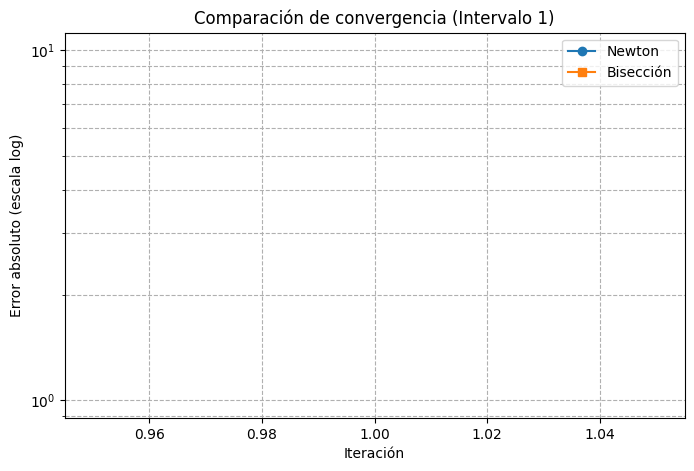


=== Intervalo 2: [4.9550, 4.9670] ===
Raíz real pprox 4.9651142317
Método Newton es x = 4.9651145444 en 2 iteraciones
Método de Bisección es x = 4.9651135511 en 9 iteraciones


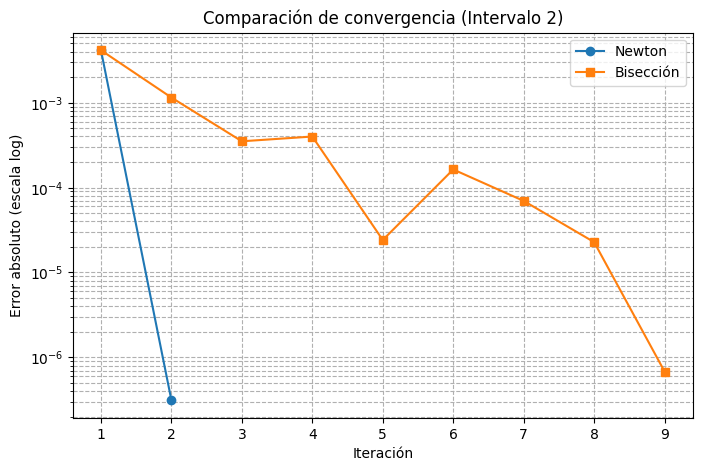

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función y su derivada
def non_lin_func(x):
    return 5.0 * np.exp(-x) + x - 5.0

def fprime_analitica(x):
    return -5.0 * np.exp(-x) + 1.0

# Método de Newton (versión que guarda trayectoria de errores)
def newton(x0, f, fprime, raiz_real, epsilon=1e-6, max_iter=100):
    x = x0
    errores = []# Lista para almacenar los errores en cada iteración
    for iteraciones in range(max_iter):

        fx = f(x)# Calcula f(x)

        error = abs(x - raiz_real)# Calcula el error absoluto

        errores.append(error)# Agrega el error a la lista

        if abs(fx) < epsilon:# Si f(x) es suficientemente pequeño, se considera que se ha encontrado la raíz
            return x, iteraciones + 1, errores

        fpx = fprime(x)
        if abs(fpx) < epsilon:  # evitar división por cero
            break

        x = x - fx / fpx# Actualiza x usando la fórmula de Newton

    raise RuntimeError("El método de Newton no convergió")

# Método de Bisección (versión que guarda trayectoria de errores)
def bisection(a, b, f, raiz_real, epsilon=1e-6, max_iter=100):

    if f(a) * f(b) >= 0:# Verifica que la función cambie de signo en el intervalo

        raise ValueError("La función debe cambiar de signo en el intervalo [a,b]")

    errores = []
    for iteraciones in range(max_iter):

        c = (a+b)/2# Punto medio del intervalo
        error = abs(c-raiz_real) # Calcula el error absoluto
        errores.append(error)

        if abs(f(c)) < epsilon:# Si f(c) es suficientemente pequeño, se considera que se ha encontrado la raíz
            return c, iteraciones + 1, errores# Retorna la raíz y el número de iteraciones

        if f(a)*f(c) < 0: # Si el signo cambia entre a y c
            b = c
        else:
            a = c

    raise RuntimeError("El método de bisección no convergió")

# Buscar intervalos donde cambia de signo
x_vals = np.linspace(-2, 10, 1000)
f_vals = non_lin_func(x_vals)

intervalos = []
signo_previo = np.sign(f_vals[0])

for i in range(1, len(x_vals)):
    signo_actual = np.sign(f_vals[i]) # Obtiene el signo actual de la función
    if signo_actual != signo_previo:
        intervalos.append((x_vals[i-1], x_vals[i])) # Agrega el intervalo a la lista
    signo_previo = signo_actual

# Comparar Newton vs Bisección en cada intervalo
for idx, (a, b) in enumerate(intervalos):
    print(f"\n=== Intervalo {idx+1}: [{a:.4f}, {b:.4f}] ===")

    # Usamos bisección con alta precisión para estimar la "raíz real"
    raiz_real, _, _ = bisection(a, b, non_lin_func, 0.0, epsilon=1e-12, max_iter=500) # Raíz real con alta precisión

    # Newton (punto inicial en el medio del intervalo)
    x0_newton = (a+b)/2
    raiz_newton, it_newton, errores_newton = newton(x0_newton, non_lin_func, fprime_analitica, raiz_real)

    # Bisección
    raiz_bisec, it_bisec, errores_bisec = bisection(a, b, non_lin_func, raiz_real)

    # Resultados
    print(f"Raíz real \approx {raiz_real:.10f}")
    print(f"Método Newton es x = {raiz_newton:.10f} en {it_newton} iteraciones")
    print(f"Método de Bisección es x = {raiz_bisec:.10f} en {it_bisec} iteraciones")

        
    # Graficar errores
    plt.figure(figsize=(8,5))
    plt.semilogy(range(1, len(errores_newton)+1), errores_newton, 'o-', label='Newton')
    plt.semilogy(range(1, len(errores_bisec)+1), errores_bisec, 's-', label='Bisección')
    plt.xlabel("Iteración")
    plt.ylabel("Error absoluto (escala log)")
    plt.title(f"Comparación de convergencia (Intervalo {idx+1})")
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.show()


En la primera gráfica, inclusive a pesar de la escala logarítmica, las líneas de tendencia no se ven posiblemente a la la rápida convergencia de ambos métodos en el primer intervalo.
En la segunda gráfica se aprecia que el método de Newton converge más rápido y de forma lineal con pocas iteraciones a comparación del método de bisección en el segundo intervalo.

# ¿Porqué Newton converge a una solución o a otra dependiendo del valor inicial?
Considerando la función
$$
f(x) =5e^{-x}+x-5
$$
definida y diferenciable en todo $\mathbb{R}$. Resolver la ecuación $f(x)=0$ implica determinar los valores de $x$ para los cuales se equilibran los términos exponenciales y lineales. El comportamiento de la función en los extremos del dominio permite entender cuántas soluciones reales pueden existir. Cuando $x \to -\infty$, el término exponencial domina y se cumple $5 e^{-x} \to +\infty \rightarrow f(x) \to +\infty$. En el límite contrario, cuando $x \to +\infty$, el término exponencial tiende a cero y se obtiene $f(x) \sim x-5\to +\infty$. Por lo tanto, la función toma valores grandes y positivos en ambos extremos de la recta real.

En valores intermedios, el análisis directo muestra que 
$$
f(0) = 5 \cdot 1 + 0 - 5 = 0
$$
lo cual establece que $x=0$ es una raíz exacta. Además, evaluando en $x=1$ se obtiene
$$
f(1) = 5 e^{-1} + 1 - 5 \approx -2.161 < 0
$$
mientras que en $x=5$ el resultado es
$$
f(5) =5e^{-5}+5-5\approx0.033 > 0 (\text{usando la calculadora})
$$
El teorema del valor intermedio garantiza, en consecuencia, la existencia de otra raíz en el intervalo $(1,5)$. Un cálculo numérico más preciso (por ejemplo, mediante bisección) sitúa esa solución en
$$
x \approx 4.9651142317
$$
Así, la función presenta exactamente dos raíces reales: la primera en $x=0$ y la segunda en torno a $x \approx 4.9651$. No aparecen otras soluciones, ya que la función sólo cambia de signo una vez adicional en el dominio positivo. El método de Newton–Raphson garantiza convergencia cuadrática en torno a una raíz $\alpha$, siempre que se cumpla $f(\alpha)=0$, $\dot{f}(\alpha) \neq 0$ y que la condición inicial esté suficientemente próxima a la solución. En el caso presente, la segunda derivada
$$
\ddot{{f }}(x)= 5e^{-x}
$$
es continua, estrictamente positiva y nunca se anula, por lo que el requisito de regularidad está garantizado.

El carácter decisivo lo impone el valor de $f'(x)$. La derivada se anula en
$$
\dot{f}(x) = 0 \quad \Longrightarrow \quad e^{-x} = \frac{1}{5} \quad \Longrightarrow \quad x = \ln(5) \approx 1.6094
$$
En esa vecindad la pendiente es nula, lo que conduce a que las iteraciones de Newton puedan sufrir saltos muy grandes o desviarse hacia otra región del dominio. Esa frontera marca el límite natural entre las dos cuencas de atracción: si el valor inicial $x_0$ se escoge por debajo de aproximadamente $1.6$, la iteración converge hacia la raíz $x=0$. En cambio, si $x_0$ es mayor que $1.6$, la dinámica lo conduce hacia la raíz grande en $x \approx 4.9651$. La presencia de un punto crítico en la derivada, entonces, determina el destino de las trayectorias generadas por el algoritmo. Por lo tanto, el contraste con el método de bisección resulta ilustrativo. Bisección, al requerir únicamente un intervalo con cambio de signo, asegura convergencia lineal hacia una raíz sin importar la condición inicial, aunque a costa de una velocidad limitada. Newton, en cambio, muestra un comportamiento dual: si se parte en la cuenca adecuada, converge con rapidez cuadrática; si no, puede desviarse o incluso divergir. Por ello, en aplicaciones prácticas resulta frecuente combinar ambos enfoques, la robustez global de bisección provee intervalos seguros, y Newton, aplicado dentro de ellos, garantiza una refinación mucho más rápida y sensible a las condiciones iniciales o dependiente a estas en razón de la propia definición del método y que geométrica implica que las curvas que se forman, se salgan o desvíen del punto al se quiere llegar, el cual es la solución de la ecuación. No obstante, toda desviación continúa es homeomorfamente equivalente si pertenece a la misma clase de equivalence homotópica, dejando a las cantidades físicas observables, invariantes.